# Сomparison first 15 epochs with last 15 epochs

In [1]:
%matplotlib inline
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True)

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [3]:
mag_only = raw.copy().pick_types(meg='mag')
events = mne.find_events(raw, stim_channel='STI 014')
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}
epochs = mne.Epochs(mag_only, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped


In [12]:
epochs_left = epochs['Auditory/Left']
epochs_right = epochs['Auditory/Right']

In [21]:
#Take 15 first and last epochs from our data
epochs_left_st = epochs_left[:15]
epochs_left_end = epochs_left[-15:]
epochs_right_st = epochs_right[:15]
epochs_right_end = epochs_right[-15:]

In [22]:
left_evoked_st = epochs_left_st.average()
left_evoked_end = epochs_left_end.average()
right_evoked_st = epochs_right_st.average()
right_evoked_end = epochs_right_end.average()

combining channels using "gfp"
combining channels using "gfp"


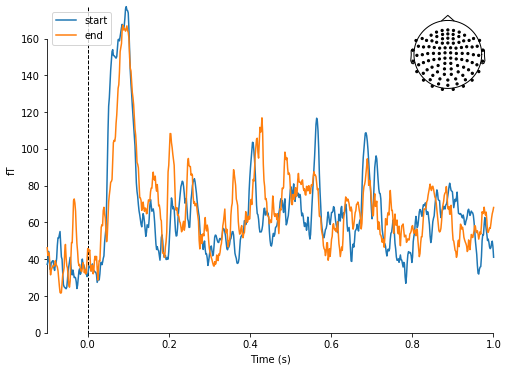

In [23]:
mne.viz.plot_compare_evokeds(dict(start=left_evoked_st, end=left_evoked_end),
                             legend='upper left', show_sensors='upper right');

combining channels using "gfp"
combining channels using "gfp"


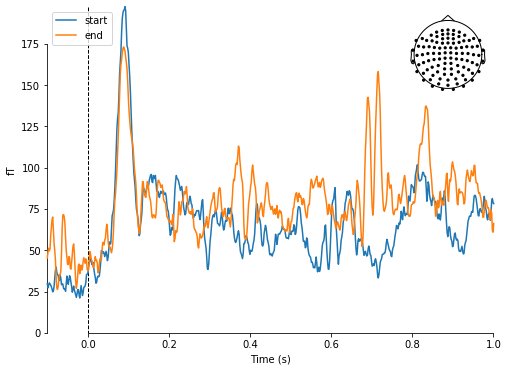

In [24]:
mne.viz.plot_compare_evokeds(dict(start=right_evoked_st, end=right_evoked_end),
                             legend='upper left', show_sensors='upper right');

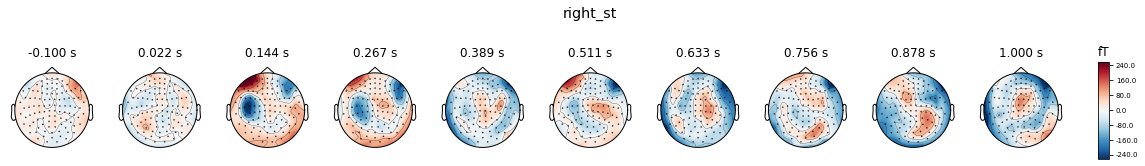

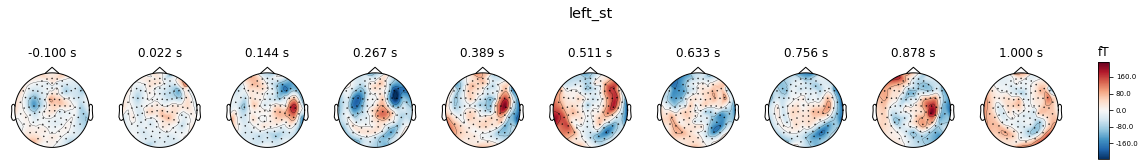

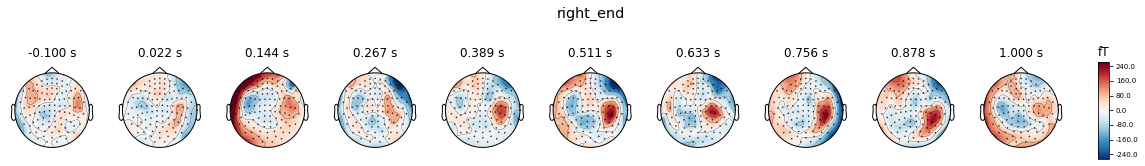

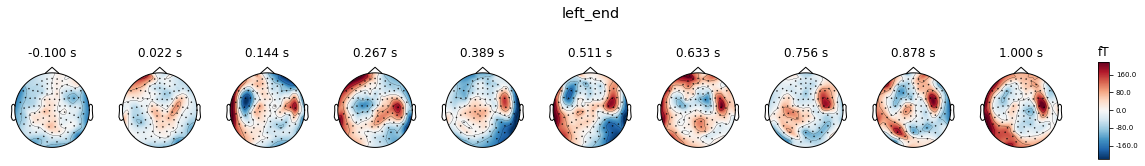

In [25]:
t = np.linspace(-0.100, 1.0, num=10)
right_evoked_st.plot_topomap(times = t, title ='right_st');
left_evoked_st.plot_topomap(times = t, title = 'left_st'); 
right_evoked_end.plot_topomap(times = t, title ='right_end');
left_evoked_end.plot_topomap(times = t, title = 'left_end'); 